# Forecasting apartment prices - ML Project
> As I moved to another state and was looking for a new apartment to rent, I started wondering: can I use machine learning to find seasonality patterns? Are months where rent is cheaper so I can save money before leasing an apartment?

#### Data Source
Apartment List data: https://www.apartmentlist.com/research/category/data-rent-estimates

### Time Series Forecasting
- It's a supervised learning model where you have input variables (__*X*__) and an output variable (__*y*__) and you use an algorithm to learn the mapping function from the input to the output.
  - _**X**_ variable &rightarrow; datetime
  - _**y**_ variable &rightarrow; price

## 1. Import and load the data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# File path
file_path = 'Apartment_List_Rent_Estimates_City_2022_4.csv'

# Display dataset
rawDF = pd.read_csv(file_path)
rawDF.head()

,City_Name,FIPS_Code,Population,Bedroom_Size,2017_01,2017_02,2017_03,2017_04,2017_05,2017_06,...,2021_07,2021_08,2021_09,2021_10,2021_11,2021_12,2022_01,2022_02,2022_03,2022_04
0,"Birmingham, AL",107000,212297,_Overall,807.00,811.00,817.00,824.00,833.00,836.00,...,986.00,999.00,1004.00,998.00,992.00,997.00,1007.00,1018.00,1025.00,1036.00
1,"Birmingham, AL",107000,212297,1br,680.00,683.00,688.00,694.00,702.00,704.00,...,831.00,841.00,845.00,840.00,835.00,839.00,848.00,858.00,863.00,872.00
2,"Birmingham, AL",107000,212297,2br,794.00,798.00,804.00,811.00,819.00,822.00,...,970.00,982.00,987.00,981.00,975.00,980.00,990.00,1001.00,1007.00,1018.00
3,"Daphne, AL",119648,25901,_Overall,1316.00,1314.00,1255.00,1219.00,1195.00,1218.00,...,1593.00,1635.00,1657.00,1633.00,1614.00,1625.00,1630.00,1639.00,1626.00,1646.00
4,"Daphne, AL",119648,25901,1br,971.00,969.00,926.00,899.00,881.00,898.00,...,1175.00,1206.00,1222.00,1205.00,1190.00,1199.00,1202.00,1209.00,1199.00,1214.00


In [3]:
# Rename Pandas columns to lower case
rawDF = rawDF.rename(columns=str.lower)
print(rawDF.columns)

Index(['city_name', 'fips_code', 'population', 'bedroom_size', '2017_01',
       '2017_02', '2017_03', '2017_04', '2017_05', '2017_06', '2017_07',
       '2017_08', '2017_09', '2017_10', '2017_11', '2017_12', '2018_01',
       '2018_02', '2018_03', '2018_04', '2018_05', '2018_06', '2018_07',
       '2018_08', '2018_09', '2018_10', '2018_11', '2018_12', '2019_01',
       '2019_02', '2019_03', '2019_04', '2019_05', '2019_06', '2019_07',
       '2019_08', '2019_09', '2019_10', '2019_11', '2019_12', '2020_01',
       '2020_02', '2020_03', '2020_04', '2020_05', '2020_06', '2020_07',
       '2020_08', '2020_09', '2020_10', '2020_11', '2020_12', '2021_01',
       '2021_02', '2021_03', '2021_04', '2021_05', '2021_06', '2021_07',
       '2021_08', '2021_09', '2021_10', '2021_11', '2021_12', '2022_01',
       '2022_02', '2022_03', '2022_04'],
      dtype='object')


## 2. Filter dataset

In [4]:
# Filter DataFrame for Raleigh in city_name column
cityDF = rawDF[rawDF['city_name'] == 'Raleigh, NC']
cityDF.head(5)

,city_name,fips_code,population,bedroom_size,2017_01,2017_02,2017_03,2017_04,2017_05,2017_06,...,2021_07,2021_08,2021_09,2021_10,2021_11,2021_12,2022_01,2022_02,2022_03,2022_04
1305,"Raleigh, NC",3755000,464485,_Overall,1074.00,1068.00,1065.00,1070.00,1091.00,1102.00,...,1325.00,1377.00,1415.00,1424.00,1415.00,1400.00,1403.00,1418.00,1435.00,1447.00
1306,"Raleigh, NC",3755000,464485,1br,943.00,938.00,935.00,939.00,957.00,968.00,...,1163.00,1208.00,1242.00,1250.00,1242.00,1229.00,1232.00,1245.00,1260.00,1270.00
1307,"Raleigh, NC",3755000,464485,2br,1073.00,1067.00,1063.00,1068.00,1089.00,1100.00,...,1322.00,1374.00,1412.00,1421.00,1412.00,1398.00,1401.00,1416.00,1433.00,1445.00


In [5]:
# Filter for 1 bedrooms in Raleigh DataFrame
oneDF = cityDF[cityDF['bedroom_size'] == '1br']
oneDF.head()

,city_name,fips_code,population,bedroom_size,2017_01,2017_02,2017_03,2017_04,2017_05,2017_06,...,2021_07,2021_08,2021_09,2021_10,2021_11,2021_12,2022_01,2022_02,2022_03,2022_04
1306,"Raleigh, NC",3755000,464485,1br,943.00,938.00,935.00,939.00,957.00,968.00,...,1163.00,1208.00,1242.00,1250.00,1242.00,1229.00,1232.00,1245.00,1260.00,1270.00


## 3. Transpose and clean dataset

In [6]:
# Transpose DataFrame
df = oneDF.set_index("bedroom_size").transpose()[3:]
df.reset_index(inplace=True)

# Renaming columns
df.columns = ["ds", "y"]
df.head()

,ds,y
0,2017_01,943.00
1,2017_02,938.00
2,2017_03,935.00
3,2017_04,939.00
4,2017_05,957.00


In [7]:
# Convert the 'Date' column to datetime format
# Check the format of 'Date' column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      64 non-null     object
 1   y       64 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [8]:
# Replace '_' with '/' in the 'ds' column so we can convert to datetime
df['ds'] = df['ds'].str.replace("_", "/")
df.head()

,ds,y
0,2017/01,943.00
1,2017/02,938.00
2,2017/03,935.00
3,2017/04,939.00
4,2017/05,957.00


In [9]:
# Prophet takes 'ds' (datetime) and 'y' (numeric) as input columns
# Convert the 'ds' column to datetime format and 'y' column to numeric format
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = pd.to_numeric(df['y'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      64 non-null     datetime64[ns]
 1   y       64 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


## Put all the steps above in a function

In [10]:
def process_df(df, city, num_beds):
    """
    This function takes 3 variables (df, city, num_beds) and cleans the DataFrame based on these variables.
    df: DataFrame that will be used
    city: The city we want to filter the DF
    num_beds: The number of bedrooms we want to filter. It can be 1, 2, 3, 's', 'o', where 's' = Studio, and 'o' = Overall.
    """
    # Mapping bedroom sizes with input
    bed_size = {1:'1br', 2:'2br', 3:'3br', 's':'_Studio', 'o':'_Overall'}
    
    # Rename Pandas columns to lower case
    df = df.rename(columns=str.lower)
    
    # Filter the city_name column in the DataFrame based on the city variable
    cityDF = df[df['city_name'].str.lower().str.startswith(city.lower())]
    
    # Filter bedroom size 
    bedDF = cityDF[cityDF['bedroom_size'] == bed_size[num_beds]]
    
    # Transpose DataFrame
    df = bedDF.set_index("bedroom_size").transpose()[3:]
    df.reset_index(inplace=True)

    # Renaming columns
    df.columns = ["ds", "y"]
    
    # Replace '_' with '/' in the 'ds' column so we can convert to datetime
    df['ds'] = df['ds'].str.replace("_", "/")
    
    # Prophet takes 'ds' (datetime) and 'y' (numeric) as input columns
    # Convert the 'ds' column to datetime format and 'y' column to numeric format
    df['ds'] = pd.to_datetime(df['ds'])
    df['y'] = pd.to_numeric(df['y'])
    
    return df

In [11]:
# Calling function and passing values
# Filtering for 1 bedroom apartments in Raleigh, NC
df = process_df(df=rawDF, city='Raleigh', num_beds=1)
df.head()

,ds,y
0,2017-01-01,943.0
1,2017-02-01,938.0
2,2017-03-01,935.0
3,2017-04-01,939.0
4,2017-05-01,957.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      64 non-null     datetime64[ns]
 1   y       64 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


## Machine learning perspective
_**A model is a story we tell about our data.**_ There are always many stories that can be told by the same data set.

When we are building a model, we are making the assumption that our data has two parts, __*signal*__ and __*noise*__. 
- __*Signal*__ is the pattern, the repeatable process that we hope to capture and describe. **It is the information that we care about**. The signal is what lets the model generalize to new situations.
- __*Noise*__ is everything else that gets in the way. It is imperfections in our sensors, wrong data, variations driven by **forces that we can’t predict**. It is all the other stuff.


## The challenge!
_**The goal of model is to describe the signal, despite the noise!!**_

A perfect model describes the signal exactly, and ignores all of the noise. If a model fails to capture all of the signal, that type of error is called _**bias**_. If a model captures of some of the noise, that type of error is called __*variance*__. 

- Too much _**bias**_ in our model means that it will perform poorly in all situations because it hasn’t captured the signal well. You may also hear this called __*underfitting*__.
- Too much __*variance*__ in our model will also cause it to fail. It won’t generalize well. Instead of capturing just the pattern we care about, it will also capture a lot of extraneous noise that we don’t care about. This is also called __*overfitting*__.

__NOTE:__ The patterns in the noise will be different from situation to situation. When we try to generalize and apply or model to a new situation, it will have extra error. The more complex our model, the greater the risk of overfitting.

## 4. Plotting the data

### Task
>What do you think is the __*signal*__ and __*noise*__ in our data?
- **Signal** = the __*pattern*__, the information we care about
- **Noise** = everything else, the __*imperfections*__, the forces that we cannot predict

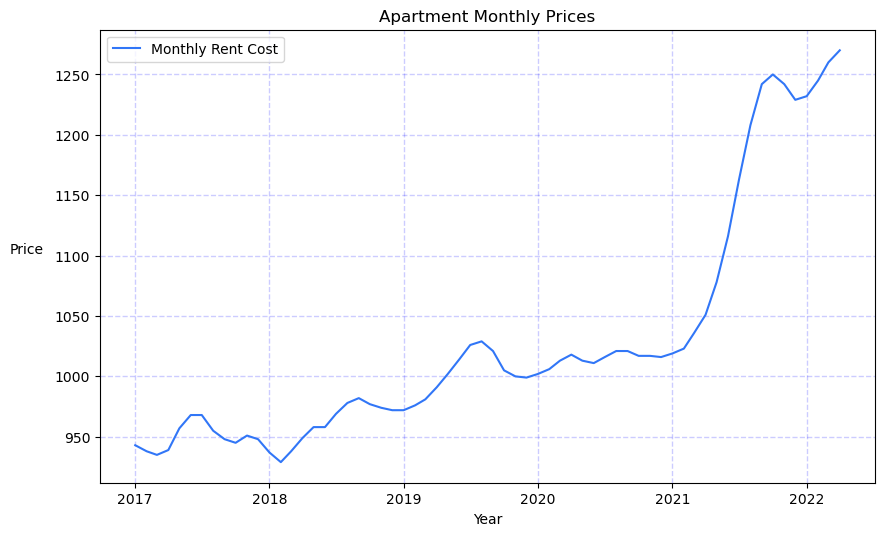

In [13]:
plt.figure(figsize=(10,6), dpi=100)
plt.title('Apartment Monthly Prices')
plt.xlabel("Year")
plt.ylabel("Price", rotation=0, labelpad=20)
plt.plot(df.set_index('ds'), color='#3176f7')
plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
plt.legend(["Monthly Rent Cost"]);
plt.show()

## Signal vs Noise
>SIGNAL = _**Seasonality pattern**_

>NOISE = _**Covid**_

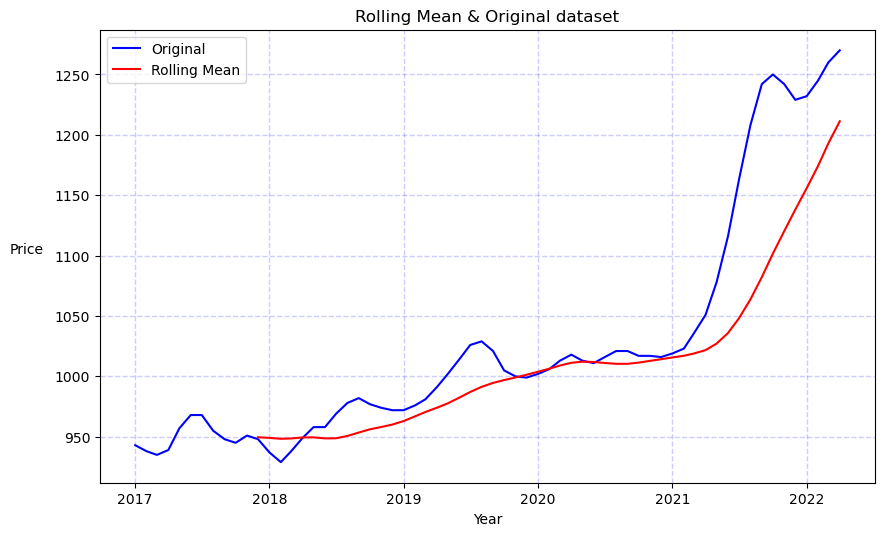

In [14]:
# Setting an index for the DataFrame
indexDF = df.set_index('ds')

# Rolling statistics
rolMean = indexDF.rolling(window=12).mean() # Rolling mean over a period of 12 months
rolStd = indexDF.rolling(window=12).std() # Rolling standard deviation over a period of 12 months

# Plotting rolling statistics
plt.figure(figsize=(10,6), dpi=100)
orig = plt.plot(indexDF, color='blue', label='Original')
mean = plt.plot(rolMean, color='red', label='Rolling Mean')
plt.title('Rolling Mean & Original dataset')
plt.xlabel("Year")
plt.ylabel("Price", rotation=0, labelpad=20)
plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
plt.legend(loc="best")
# plt.show(block=False)
plt.show()

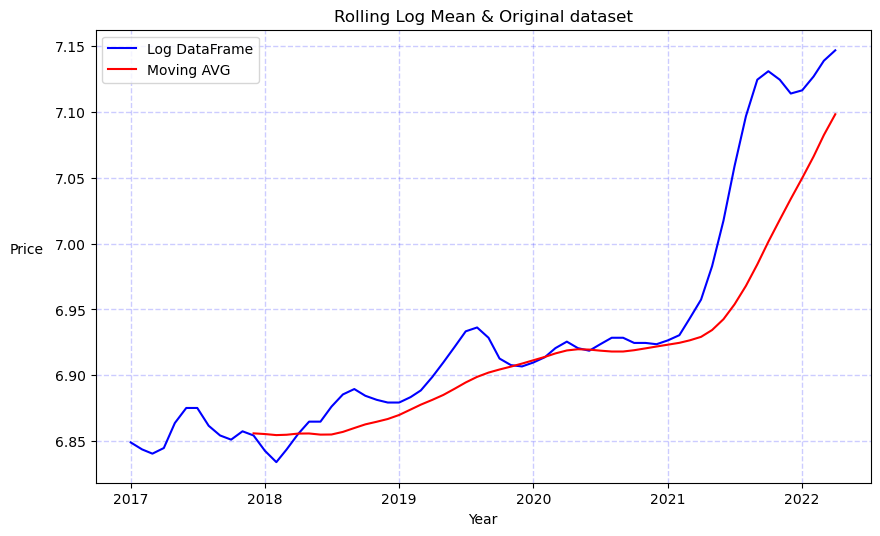

In [15]:
# Log Average and Original DF
def timeSeries(dataframe):
    # Estimating trend
    logDF = np.log(dataframe)

    # Defining the moving average
    movingAVG = logDF.rolling(window=12).mean()

    # Plotting rolling statistics
    plt.figure(figsize=(10,6), dpi=100)
    log = plt.plot(logDF, color='blue', label='Log DataFrame')
    movingAVG = plt.plot(movingAVG, color='red', label='Moving AVG')
    plt.title('Rolling Log Mean & Original dataset')
    plt.xlabel("Year")
    plt.ylabel("Price", rotation=0, labelpad=20)
    plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
    plt.legend(loc="best")
    # plt.show(block=False)
    plt.show()
    
timeSeries(indexDF)

## 5. Forecast time!!!
### Import Prophet

In [16]:
# Install Prophet
# !pip install pystan==2.19.1.1
# !pip install prophet

In [17]:
# Import Prophet
from prophet import Prophet

# Remove repeating error message as output
import logging
# logger = spark._jvm.org.apache.log4j
logging.getLogger("py4j.java_gateway").setLevel(logging.ERROR)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


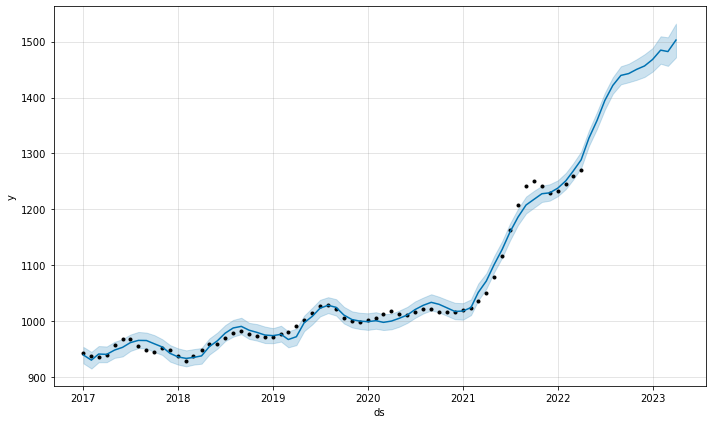

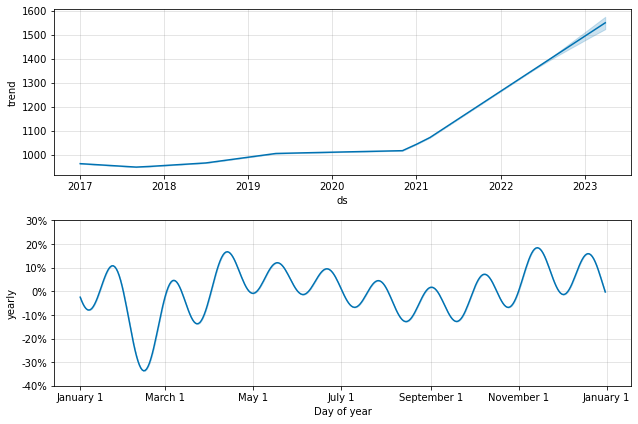

In [18]:
# Make forecast model using Prophet
model = Prophet(seasonality_mode='multiplicative').fit(df) # Fit the model
future = model.make_future_dataframe(periods=12, freq='MS') # Configure predictions
fcst = model.predict(future) # Make predictions
fig = model.plot(fcst) # Plotting forecast model
model.plot_components(fcst); # Different components of time series

In [19]:
# fcst.head().T

## Summary:
- Visualizations are awesome to see and analyze trends!
- Covid-19 had a significant impact on apartment prices
- Predictions are a reflection of our data. _**Imbalanced data = Imbalanced forecast**_

**SIGNAL:** what we want the model to explain
- August high prices &rightarrow; school starts, summer months
- January low prices &rightarrow; nobody wants to move during holidays

**NOISE:** what we don't want the model to explain 
- Not interested in predicting Covid


## Next steps:
1. Create DataFrame before February 2020 (before Covid) to **remove the noise**
2. Compare forecast models with and without Covid data
3. Apartment web scraping + email application: if rent comes under forecast &rightarrow; receive email of that apartment listing

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


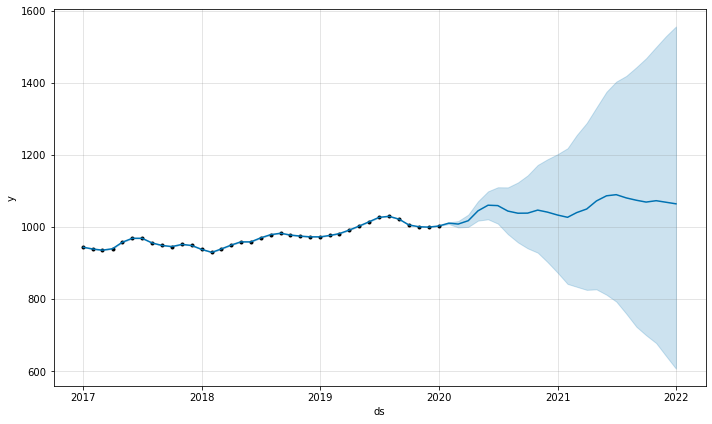

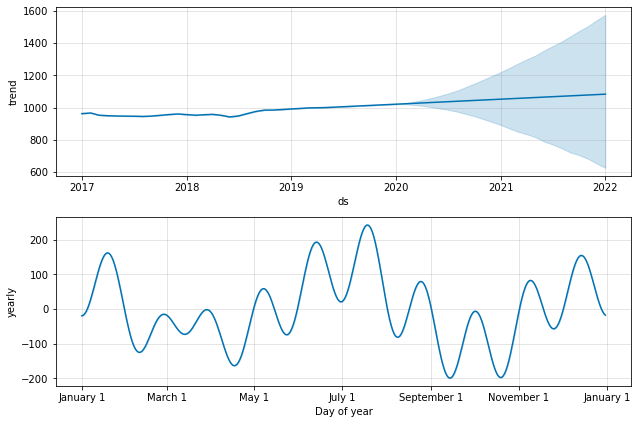

In [20]:
# Filtering data before Covid
normalDF = df[df['ds'] < '2020-02-01']

# Make forecast model using Prophet
model = Prophet().fit(normalDF) # Fit the model
future = model.make_future_dataframe(periods=24, freq='MS') # Configure predictions
forecast = model.predict(future) # Make predictions
fig = model.plot(forecast) # Make figures
components = model.plot_components(forecast) # Plot figures

In [21]:
# Components figure will now show the seasonality as a percent of the trend:
# model.plot_components(forecast)

### Model Tuning
_**Tuning**_ is the process of maximizing a model’s performance without overfitting or creating too high of a variance. In machine learning, this is accomplished by selecting appropriate “hyperparameters.”

In [22]:
# Create Multiplicative prediction function
def rent_prediction(dataframe):
    # Instantiate the model, configure the parameters
    model = Prophet(
      interval_width=0.95,
      growth='linear',
      daily_seasonality=False,
      weekly_seasonality=False,
      yearly_seasonality=True,
      seasonality_mode='multiplicative'
    )
    
    # Fit the model
    model.fit(dataframe)

    # Configure predictions
    future = model.make_future_dataframe(
      periods=24,
      freq='MS',
      include_history=True
    )

    # Make predictions
    forecast = model.predict(future)
    
    # Make figures
    fig = model.plot(forecast)
    components = model.plot_components(forecast)

    # Return predictions
    return fig, components

(<Figure size 720x432 with 1 Axes>, <Figure size 648x432 with 2 Axes>)

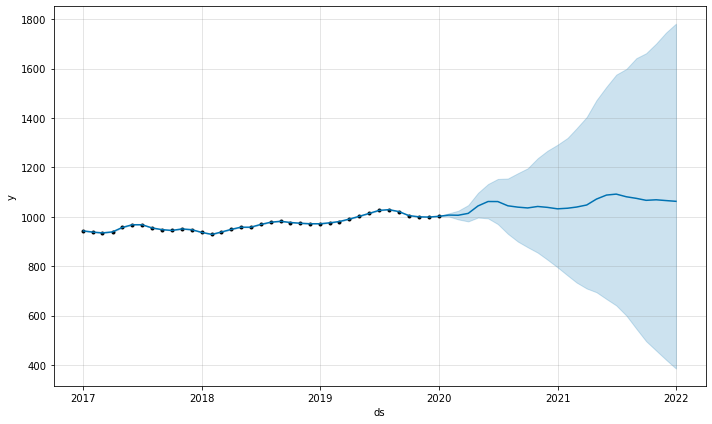

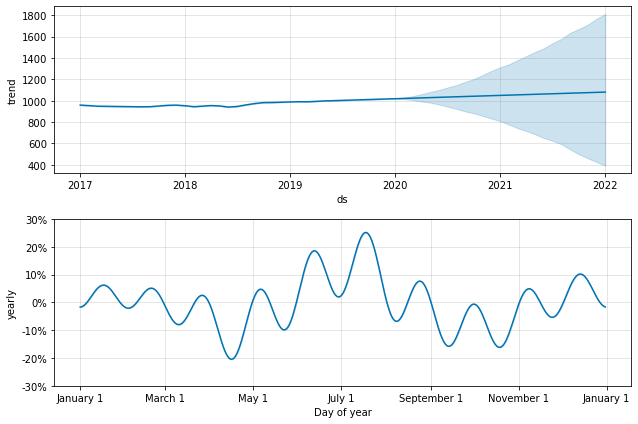

In [23]:
# Calling the prediction function
rent_prediction(normalDF)

(<Figure size 720x432 with 1 Axes>, <Figure size 648x432 with 2 Axes>)

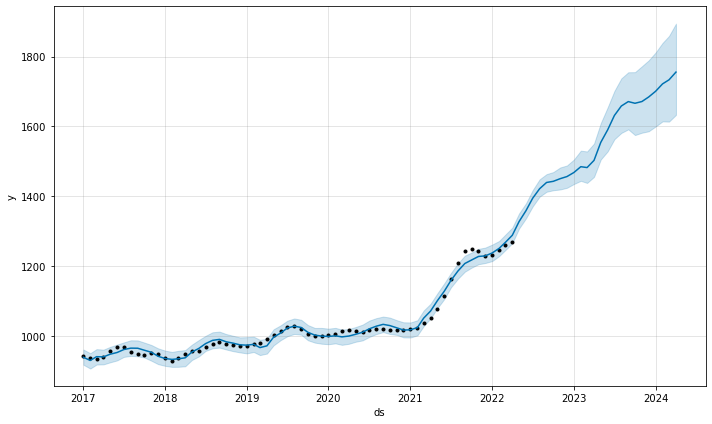

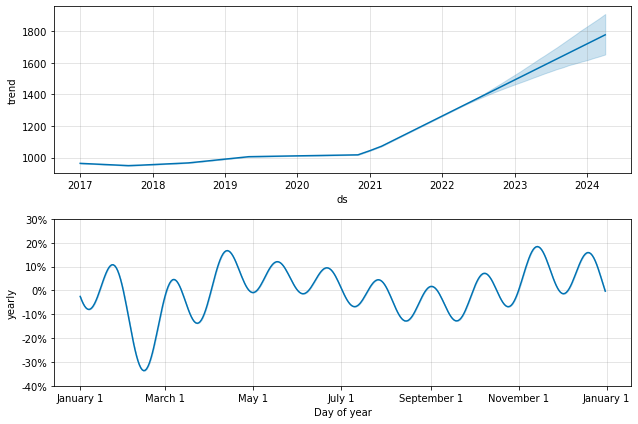

In [24]:
# Forecast Covid data using function
rent_prediction(df)

# Key take-aways
- Apartment rental prices would be around $\$200$ cheaper if Covid didn't happen.
- We could save more than $\$1000$ per year by just renting on a different time of the year - January is much cheaper than August
- I rented my apartment on the worst possible month to rent in Raleigh. **GREAT!!** 😭
- 3 years of data is not a lot. More data could potentially improve the performance of the model.

We know what __*forecast*__ is and the difference between __*signal*__ and *__noise__*...

## Cool, but now what?
>__*How do we know it works? We need to evaluate the model performance!!*__

### Next steps:
1. Filter 2017 - 2019 as training data
2. Filter 2019 - 2020 as test
3. Calculate _**RMSE (Root Mean Squared Error)**_
4. Calculate _**MAE (Mean Absolute Error)**_


_**Disclaimer:** there is no one-size-fits-all metric!_

### RMSE vs MAE
_**RMSE (Root Mean Squared Error)**_ is the standard deviation of the residuals. _Distance between the predicted values and the actual values._
- _**Standard deviation**_ is a measure of how spread out the data is.
- _**Residuals**_ are a measure of how far from the line the data points are.

_**MAE (Mean Absolute Error)**_ represents the average of the absolute difference between the actual and predicted values.
- It measures the _**average of the residuals**_.
- Simple and easy to interpret.


### Bottom Line
__*RMSE and MAE evaluate the accuracy of the model!*__ They are metrics used to evaluate the performance of the model in regression analysis.
- Use _**RMSE**_ if you want to penalize large errors.
- Use *__MAE__* if you don’t want a few far off predictions to overwhelm a lot of close ones.
- "Small" values = better performance!
    - “small” will depend on our choice of units, and on the specific application we are hoping for. 
    - 1000 dollars is a big error in apartment prices, but 1000 cents is not.

In [25]:
# Defining training and test set
trainDF = df[df['ds'] < '2019-01-01'] # Filter data for 2017 - 2019 as train set
testDF = df[(df['ds'] >= '2019-01-01') & (df['ds'] < '2020-03-01')] # Filter data between 2019 - 2020 as test set

INFO:prophet:n_changepoints greater than number of observations. Using 18.


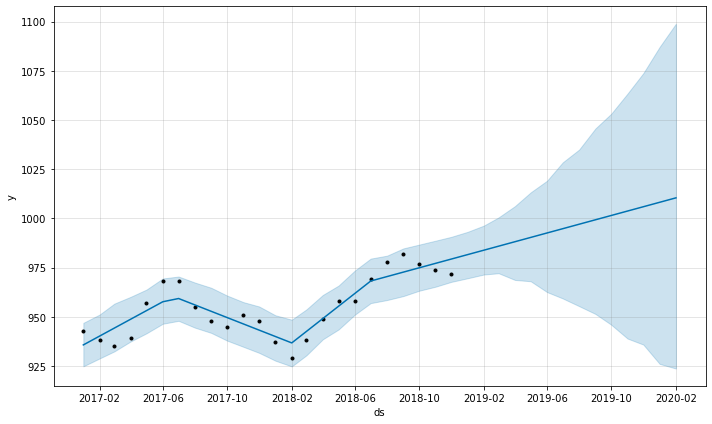

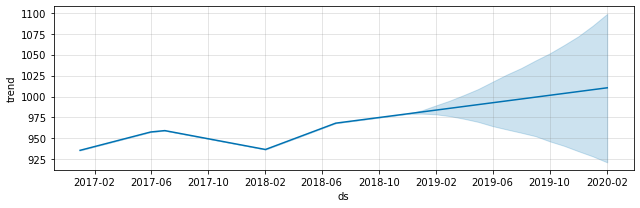

In [26]:
# Make forecast model using Prophet
model = Prophet(
  interval_width=0.95,
  growth='linear',
  daily_seasonality=False,
  weekly_seasonality=False,
  yearly_seasonality=False,
  seasonality_mode='multiplicative'
)

# Train model on trainDF
model.fit(trainDF)

# Configure predictions
future = model.make_future_dataframe(periods=14, freq='MS')

# Make predictions
forecast = model.predict(future)

# Make figure
fig = model.plot(forecast)
comp = model.plot_components(forecast)

## RMSE 
Root Mean Square Error (RMSE) is a standard way to measure the error of a model in predicting quantitative data. RMSE has the benefit of penalizing large errors.

Useful on data we have not trained
- Compare last 12 months of forecast DF with testDF
- Run RMSE and MAE on testDF

In [27]:
# Filtering for last 12 months of forecast DF to compare with testDF
pred = forecast[forecast['ds'] >= '2019-01-01']

In [28]:
# Checking if both dataframes have the same number of rows to calculate RMSE
print(pred['yhat'].count())
print(testDF['y'].count())

14
14


In [29]:
# RMSE
se = np.square(pred['yhat'] - testDF['y']) 
mse = np.mean(se)
rmse = np.sqrt(mse)

# Print results
print("MSE:", mse)
print('RMSE:', rmse)

MSE: 241.32165047881844
RMSE: 15.534530906300919


In [30]:
# RMSE using scikit-learn
from sklearn.metrics import mean_squared_error

In [31]:
mse = mean_squared_error(testDF['y'], pred['yhat'])
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 241.3216504788185
RMSE: 15.53453090630092


## MAE (Mean Absolute Error)
MAE refers to the mean of the absolute values of each prediction error on all instances of the test data-set. 
- Prediction error is the difference between the actual value and the predicted value for that instance.

In [32]:
# MAE using scikit-learn
from sklearn.metrics import mean_absolute_error

In [33]:
mae = mean_absolute_error(testDF['y'], pred['yhat'])
print("MAE:", mae)

MAE: 11.996671748937924


## Summary: RMSE vs MAE

| Metric | Value |
| ------ | ----- |
| RMSE   | 21.08 |
| MAE    | 17.23 |

What this actually means:
- On average, **RMSE** evaluated that our predictions were off by $+- \$21.08$ from the actual price.
- On average, **MAE** evaluated that our predictions were off by $+- \$17.23$ from the actual price.

We are only off by $\$20$ when predicting apartment prices in Raleigh. That's not bad!

## MAPE (Mean Absolute Percentage Error)

The mean absolute percentage error (MAPE), also known as mean absolute percentage deviation (MAPD), is a measure of prediction accuracy of a forecasting method in statistics.

MAPE divides each error individually by the demand, so it is skewed: 
- High errors during low-demand periods will significantly impact MAPE. 
- Due to this, optimizing MAPE will result in a strange forecast that will most likely undershoot the price.
- Just avoid it.

In [34]:
# MAPE calculation
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [35]:
mean_absolute_percentage_error(testDF['y'], pred['yhat'])

1.1859859146129441

# Next step
### Time to web scrape some apartments!!